In [3]:
inputEntries=156503

tenth = int(inputEntries / 10)

print(tenth)

tenth_counter = 1
print("Progress at 0%")
for entry in range(inputEntries):
        if ( entry+1 == tenth_counter*tenth ):
          print(tenth_counter * 10, "%...")
          tenth_counter=tenth_counter+1;
   

15650
Progress at 0%
10 %...
20 %...
30 %...
40 %...
50 %...
60 %...
70 %...
80 %...
90 %...
100 %...


In [12]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../CommonUtils/') # https://github.com/glukicov/EDMTracking/tree/master/CommonUtils
import CommonUtils as cu
font_size=16

In [19]:
path="../DATA/HDF/MMA/9D.h5"
data_tracks = pd.read_hdf(path, 'QualityTracks')
data_verticies = pd.read_hdf(path, 'QualityVertices')

In [20]:
data_tracks.shape[0], data_verticies.shape[0]

(14628671, 5089097)

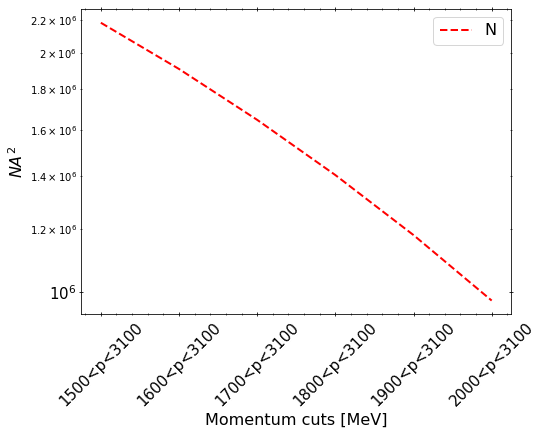

In [25]:
# fig, ax = cu.plot(df['Cut'], NA_2_edm, fs=font_size, label=r"$NA^2_{\rm{EDM}}$", lw=2, tight=True, figsize=(8,5), plot=True)
fig, ax = cu.plot(df['Cut'],  df['N'], fs=font_size, label="N", lw=2, tight=True, figsize=(8,5), ls="--", c="r", plot=True)
# fig, ax = cu.plot(df['Cut'],  df['A_edm'], fs=font_size, label=r"$A_{\rm{EDM}}$", lw=2, tight=True, figsize=(8,5), ls=":", c="k")
ax.set_xlabel(xlabel="Momentum cuts [MeV]", fontsize=font_size)
ax.set_ylabel(ylabel=r"$NA^2$", fontsize=font_size)
ax.legend(fontsize=font_size)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_yscale('log')
fig.savefig("../fig/NA_edm.png", dpi=300)

In [26]:
df=pd.read_csv("../DATA/misc/df_cuts_bz.csv")
df

,Unnamed: 0,Cut,N,A_bz,A_edm,chi2
0,0,1500<p<3100,2183667,-0.054547,0.158951,1.394932
1,1,1600<p<3100,1909299,-0.045982,0.164984,1.331251
2,2,1700<p<3100,1647119,-0.025605,0.160380,0.936203
3,3,1800<p<3100,1403231,-0.022231,0.134676,0.945260
4,4,1900<p<3100,1178812,-0.009816,0.132619,0.870143
5,5,2000<p<3100,974660,-0.004299,0.130666,1.377958


In [27]:
NA_2_bz = df['N'] * df['A_bz'] ** 2

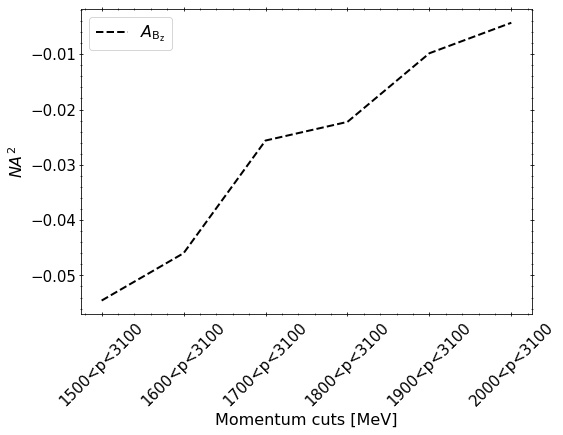

In [30]:
# fig, ax = cu.plotScatter(df['Cut'], NA_2_bz, font_size=font_size, label=r"$NA^2_{\rm{B_z}}$", lw=2, tight=True, figsize=(8,5))
# fig, ax = cu.plotScatter(df['Cut'], df['N'], font_size=font_size, label=r"N", lw=2, tight=True, figsize=(8,5), ls="--", input_color="r")
fig, ax = cu.plot(df['Cut'], df['A_bz'], fs=font_size, label=r"$A_{\rm{B_z}}$", lw=2, tight=True, figsize=(8,5), ls="--", c="k", plot=True)
ax.set_xlabel(xlabel="Momentum cuts [MeV]", fontsize=font_size)
ax.set_ylabel(ylabel=r"$NA^2$", fontsize=font_size)
ax.legend(fontsize=font_size)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
# ax.set_yscale('log')
fig.savefig("../fig/NA_edm.png", dpi=300)

$$N(t)=Ne^{-t/\tau}[1+A\cos(\omega_at+\phi)]\cdot{C(t)}\cdot{V(t)}$$
$$ V(t) = 1.0 + e^{-t / \rm{T_{vBO}} }  \rm{A_{vBO}} \cos( \rm{WV_{vBO}} \cdot t + \phi_{\rm{vBO}} ) $$
$$  C(t) = 1.0 + e^{-t / \rm{T_{CBO}}}\rm{A_{CBO}} \cos(\omega_{\rm{CBO}} t + \phi_{\rm{CBO}}) $$

In [158]:
import seaborn as sn
import matplotlib.pyplot as plt
sys.path.append('../CommonUtils/') # https://github.com/glukicov/EDMTracking/tree/master/CommonUtils
import CommonUtils as cu
font_size=16


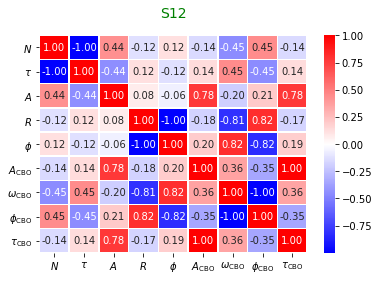

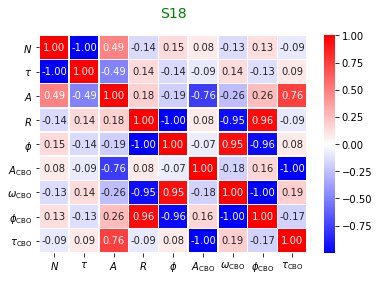

In [160]:
for i_station, station in enumerate(stations):
    df_corr = pd.DataFrame(corr[i_station],columns=names, index=names)
    fig,ax = plt.subplots()
    ax=sn.heatmap(df_corr, annot=True, fmt='.2f', linewidths=.5, cmap="bwr")
    cu.textL(ax, 0.5, 1.1, "S"+str(station))
    fig.savefig("../fig/corr_S"+str(station)+".png", dpi=300)